<a href="https://colab.research.google.com/github/vijipandian/project/blob/main/House_Price_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv(r"/content/House Price Prediction Dataset.csv")
data.head(5)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [3]:
data["Garage"]=data["Garage"].map({"No":0,"Yes":1})
data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,0,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,0,424998
2,3,3592,2,2,3,1938,Downtown,Good,0,266746
3,4,966,4,2,2,1902,Suburban,Fair,1,244020
4,5,4926,1,4,2,1975,Downtown,Fair,1,636056


In [4]:
data["Location"].value_counts()

,count
Location,
Downtown,558
Urban,485
Suburban,483
Rural,474


In [5]:
data["Location"]=data["Location"].map({"Downtown":1,"Urban":2,"Suburban":3,"Rural":4})
data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,1,Excellent,0,149919
1,2,4272,5,4,3,1958,1,Excellent,0,424998
2,3,3592,2,2,3,1938,1,Good,0,266746
3,4,966,4,2,2,1902,3,Fair,1,244020
4,5,4926,1,4,2,1975,1,Fair,1,636056


In [6]:
data["Condition"].value_counts()

,count
Condition,
Fair,521
Excellent,511
Poor,507
Good,461


In [7]:
data["Condition"]=data["Condition"].map({"Poor":0,"Fair":1,"Good":2,"Excellent":3})
data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,1,3,0,149919
1,2,4272,5,4,3,1958,1,3,0,424998
2,3,3592,2,2,3,1938,1,2,0,266746
3,4,966,4,2,2,1902,3,1,1,244020
4,5,4926,1,4,2,1975,1,1,1,636056


In [8]:
data.shape

(2000, 10)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Id         2000 non-null   int64
 1   Area       2000 non-null   int64
 2   Bedrooms   2000 non-null   int64
 3   Bathrooms  2000 non-null   int64
 4   Floors     2000 non-null   int64
 5   YearBuilt  2000 non-null   int64
 6   Location   2000 non-null   int64
 7   Condition  2000 non-null   int64
 8   Garage     2000 non-null   int64
 9   Price      2000 non-null   int64
dtypes: int64(10)
memory usage: 156.4 KB


In [10]:
data.isnull().sum()

,0
Id,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
Price,0


In [11]:
data.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,2.436500,1.488000,0.481000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,1.130755,1.126273,0.499764,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,1.000000,0.000000,0.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,1.000000,0.000000,0.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,2.000000,1.000000,0.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,3.000000,3.000000,1.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,4.000000,3.000000,1.000000,999656.000000


In [12]:
data.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [13]:
data.drop("Id",axis=1,inplace=True)

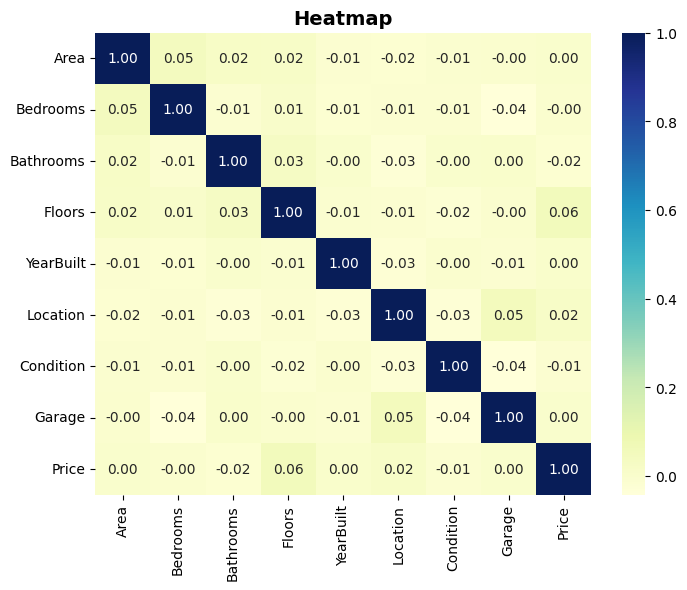

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap="YlGnBu",fmt=".2f")
plt.title("Heatmap",fontsize=14,weight='bold')
plt.show()

In [15]:
data["Bathrooms"].value_counts()

,count
Bathrooms,
3,524
4,521
2,494
1,461


In [16]:
data["Bedrooms"].value_counts()

,count
Bedrooms,
1,418
3,406
4,405
5,403
2,368


In [17]:
data.groupby("Bedrooms")["Bathrooms"].agg(["mean"])

,mean
Bedrooms,
1,2.578947
2,2.565217
3,2.509852
4,2.587654
5,2.521092


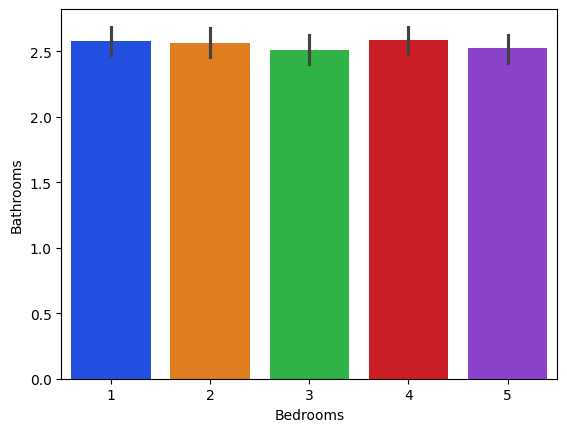

In [18]:
data.groupby("Bedrooms")["Bathrooms"].sum()
sns.barplot(x="Bedrooms",y="Bathrooms",palette='bright',hue="Bedrooms",data=data,legend=False)
plt.show()

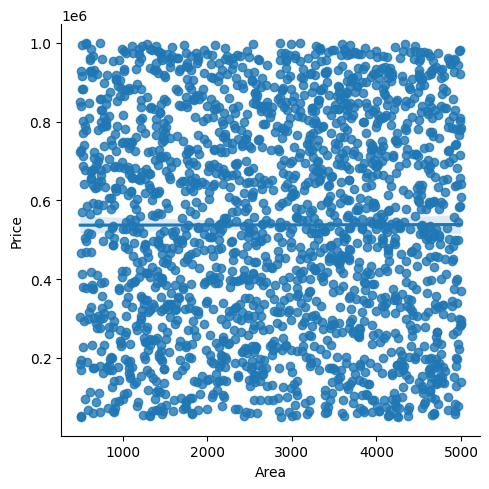

In [19]:
#Area VS Price.
sns.lmplot(x="Area",y="Price",data=data)

In [20]:
#price of sum
data.groupby("Floors")["Price"].sum()

,Price
Floors,
1,343993640
2,369365341
3,361994729


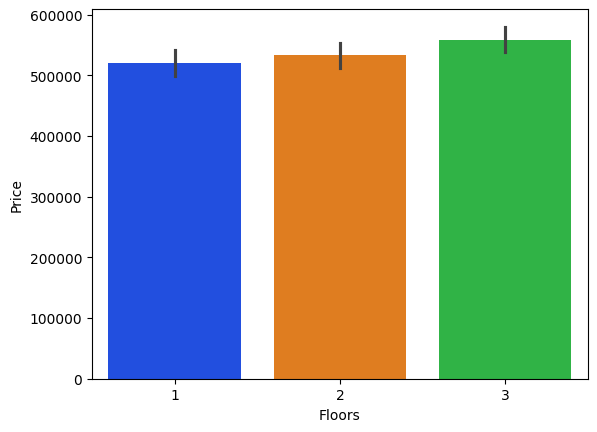

In [21]:
data.groupby("Floors")["Price"].sum()
sns.barplot(x="Floors",y="Price",palette='bright',hue="Floors",data=data,legend=False)
plt.show()

In [22]:
#Groupby funcation
data.groupby("Garage")["Price"].agg(["mean"])

,mean
Garage,
0,536920.700385
1,538492.747401


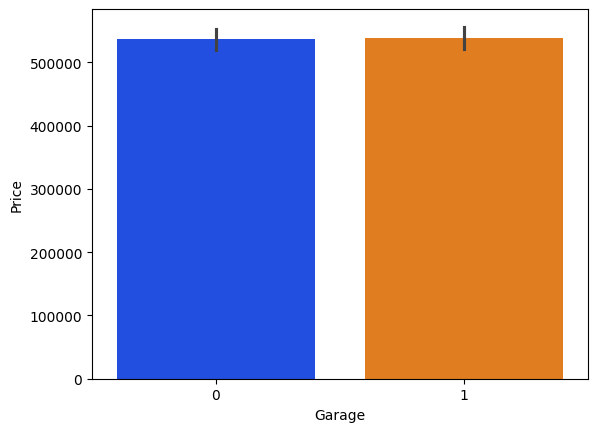

In [23]:
data.groupby("Garage")["Price"].agg(["mean"])
sns.barplot(x="Garage",y="Price",palette='bright',hue="Garage",data=data,legend=False)
plt.show()

In [24]:
data.groupby("Condition")['Price'].sum()

,Price
Condition,
0,268169142
1,292069547
2,243870084
3,271244937


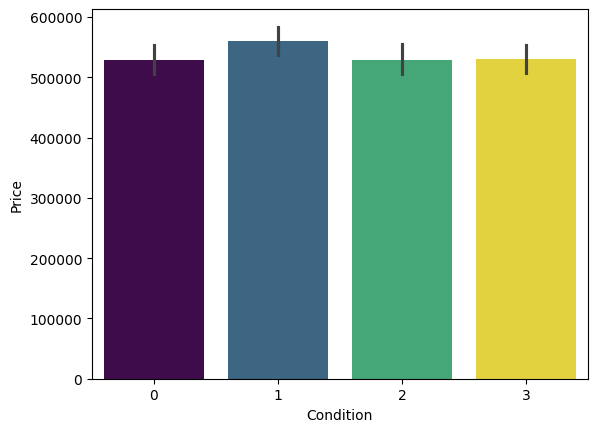

In [25]:
data.groupby("Condition")["Price"].sum()
sns.barplot(x="Condition",y="Price",palette='viridis',hue="Condition",data=data,legend=False)
plt.show()

In [26]:
data.groupby("Bedrooms")["Price"].agg(["mean"])

,mean
Bedrooms,
1,530561.622010
2,545546.521739
3,546977.894089
4,533696.930864
5,532500.124069


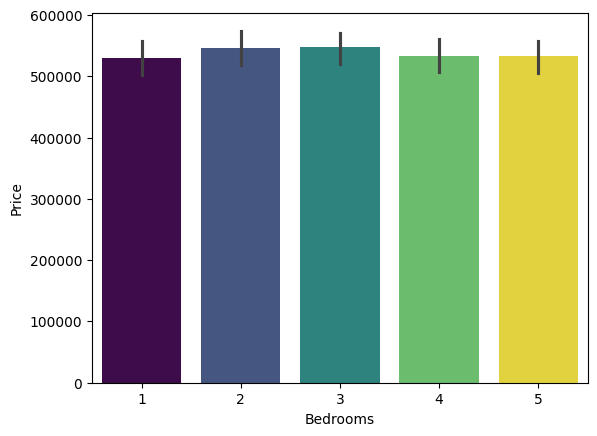

In [27]:
data.groupby("Bedrooms")["Price"].agg(["mean"])
sns.barplot(x="Bedrooms",y="Price",palette='viridis',hue="Bedrooms",data=data,legend=False)
plt.show()

In [28]:
#Price-Mean value
data.groupby("Bathrooms")["Price"].agg(["mean"])

,mean
Bathrooms,
1,558757.752711
2,516589.876518
3,540201.713740
4,536478.481766


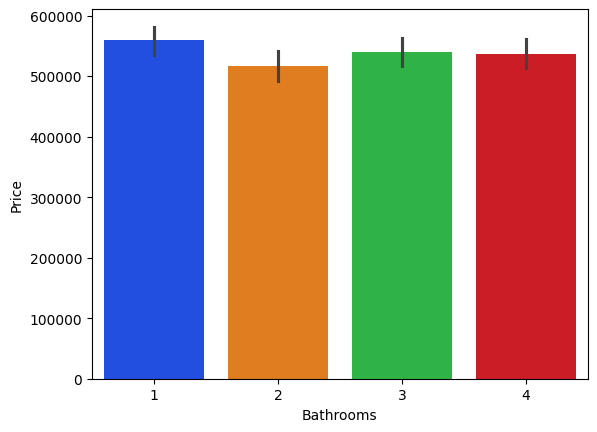

In [29]:
data.groupby("Bathrooms")["Price"].agg(["mean"])
sns.barplot(x="Bathrooms",y="Price",palette="bright",hue="Bathrooms",data=data,legend=False)
plt.show()

In [30]:
data.groupby("YearBuilt")["Price"].agg(["mean"])

,mean
YearBuilt,
1900,532297.583333
1901,554257.960000
1902,487525.428571
1903,364482.333333
1904,695236.933333
...,...
2019,592602.437500
2020,548988.500000
2021,483393.750000


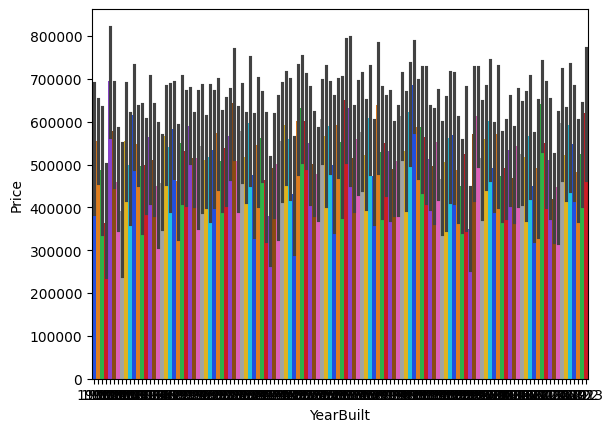

In [31]:
data.groupby("YearBuilt")["Price"].agg(["mean"])
sns.barplot(x="YearBuilt",y="Price",palette="bright",hue="YearBuilt",data=data,legend=False)
plt.show()

In [32]:
#meachine learning
x=data.drop(["Price"],axis=1)
y=data["Price"]

In [33]:
print(y)

0       149919
1       424998
2       266746
3       244020
4       636056
         ...  
1995    295620
1996    580929
1997    476925
1998    161119
1999    482525
Name: Price, Length: 2000, dtype: int64


In [49]:
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [50]:
#splilliting data into training data & test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)   #0.2 mean 20%data test data.

In [51]:
print(x.shape,x_train.shape,x_test.shape)

(2000, 8) (1600, 8) (400, 8)


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [53]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [54]:
y_pre=model.predict(x_test)
y_pre

array([514876.535712  , 543803.80036236, 494677.29133769, 550385.61138738,
       563513.34479421, 548390.90171749, 548600.54096325, 550317.98501276,
       553865.23685659, 571434.83783619, 536613.29673155, 581775.87085547,
       508906.32435302, 527330.27264181, 520540.55821559, 537025.8149369 ,
       545485.14777248, 545017.66236189, 563609.22694875, 515941.4494498 ,
       541428.46395499, 511955.39986546, 520248.38837644, 576468.87038132,
       548278.14118923, 535538.34567691, 519098.80600054, 511516.93640801,
       534920.75508451, 481801.71187116, 497193.94977896, 539850.54297804,
       556933.58076897, 571600.49886628, 515619.93594948, 502193.98927592,
       569128.68903214, 575113.92627872, 530300.92631532, 522010.43184424,
       481594.63422864, 527141.12090541, 536126.89478249, 541133.86760525,
       539888.68518076, 546664.14875634, 552119.21410499, 516120.53765114,
       541765.8588075 , 521771.03436021, 493393.95076659, 535752.35457743,
       554509.90635348, 5

In [55]:
from sklearn import metrics
print("Mean absolute error:", metrics.mean_absolute_error(y_test,y_pre))
print("Mean squared error:",mean_squared_error(y_test,y_pre))


Mean absolute error: 244665.37118781477
Mean squared error: 78864709711.87729


In [56]:
score=model.score(x_test,y_test)
print(score)

-0.013700478686581752


In [ ]:
##